### SSLAD 2021 Track 3B: Data Introduction

In this notebook there will be a short introduction on the data and the different
detection tasks in this track.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from detection_util import create_train_val_set, create_test_set_from_json

In [2]:
root = "../../data/SSLAD-2D/labeled/"
train_sets, _ = create_train_val_set(root, avalanche=False)

categories = {
    1: "Pedestrain",
    2: "Cyclist",
    3: "Car",
    4: "Truck",
    5: "Tram (Bus)",
    6: "Tricycle"
}

In [3]:
def visualize_image(idx, dataset, ax):
    img, target = dataset[idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')

    for bbox in target['boxes']:
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                               fill=False, lw=2, edgecolor='r'))

### Task 1
The first task contains 4470 images.
* City: Shanghai
* Weather: Clear
* Period: Daytime
* Location: Citystreet / Countryroad

*Note: Below the most significant change are highlighted in bolt*

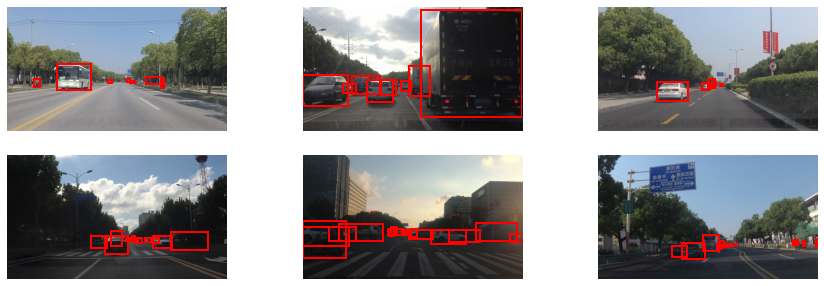

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
idxs = np.random.randint(0, len(train_sets[0]), 6)

for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, train_sets[0], ax)
plt.show()

### Task 2
The second task contains 1329 images.
* Weather: Clear/Overcast
* Period: Daytime
* Location: **Highway**

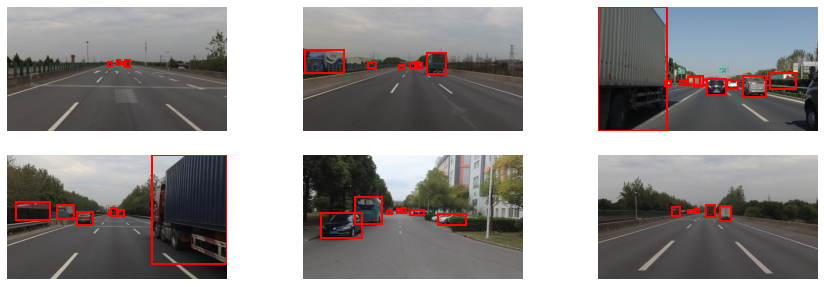

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
idxs = np.random.randint(0, len(train_sets[1]), 6)

for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, train_sets[1], ax)
plt.show()

### Task 3
The third task contains 1479 images.
* Period: **Night**

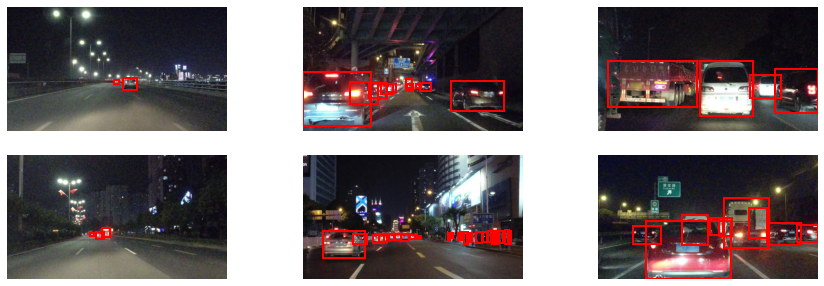

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
idxs = np.random.randint(0, len(train_sets[2]), 6)

for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, train_sets[2], ax)
plt.show()

### Task 4
The fourth task contains 524 images.
* Period: Daytime
* Weather: **Rainy**

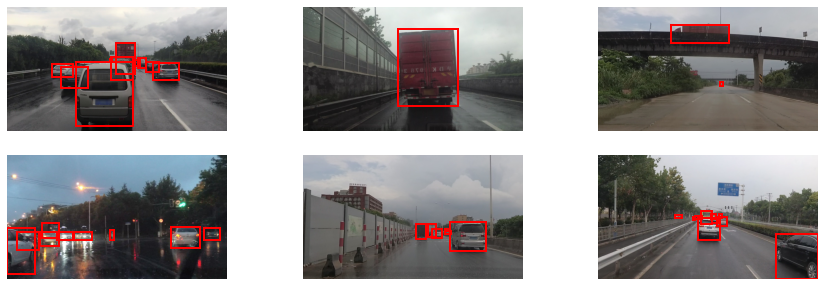

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
idxs = np.random.randint(0, len(train_sets[3]), 6)

for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, train_sets[3], ax)
plt.show()

In [8]:
test_set, _ = create_test_set_from_json(root, avalanche=False)

In [9]:
import json

test_

AttributeError: 'list' object has no attribute 'tolist'